In [338]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras

In [339]:
tf.config.set_visible_devices([], 'GPU')

## Load dataset

gender - gender of the candidate \
ssc_percentage - senior secondary exams percentage (10th Grade) \
ssc_board - board of education for ssc exams \
hsc_percentage - higher secondary exams percentage (12th Grade) \
hsc_borad - board of education for hsc exams \
hsc_subject - subject of study for hsc \
degree_percentage - percentage of marks in undergrad degree \
undergrad_degree - undergrad degree majors \
work_experience - past work experience \
emp_test_percentage - aptitude test percentage \
specialization - postgrad degree majors - (MBA specialization) \
mba_percent - percentage of marks in MBA degree \
status - status of placement. Placed / Not Placed

In [340]:
dataset = pd.read_csv('Job_Placement_Data.csv')
dataset

,gender,ssc_percentage,ssc_board,hsc_percentage,hsc_board,hsc_subject,degree_percentage,undergrad_degree,work_experience,emp_test_percentage,specialisation,mba_percent,status
0,M,67.00,Others,91.00,Others,Commerce,58.00,Sci&Tech,No,55.0,Mkt&HR,58.80,Placed
1,M,79.33,Central,78.33,Others,Science,77.48,Sci&Tech,Yes,86.5,Mkt&Fin,66.28,Placed
2,M,65.00,Central,68.00,Central,Arts,64.00,Comm&Mgmt,No,75.0,Mkt&Fin,57.80,Placed
3,M,56.00,Central,52.00,Central,Science,52.00,Sci&Tech,No,66.0,Mkt&HR,59.43,Not Placed
4,M,85.80,Central,73.60,Central,Commerce,73.30,Comm&Mgmt,No,96.8,Mkt&Fin,55.50,Placed
...,...,...,...,...,...,...,...,...,...,...,...,...,...
210,M,80.60,Others,82.00,Others,Commerce,77.60,Comm&Mgmt,No,91.0,Mkt&Fin,74.49,Placed
211,M,58.00,Others,60.00,Others,Science,72.00,Sci&Tech,No,74.0,Mkt&Fin,53.62,Placed
212,M,67.00,Others,67.00,Others,Commerce,73.00,Comm&Mgmt,Yes,59.0,Mkt&Fin,69.72,Placed
213,F,74.00,Others,66.00,Others,Commerce,58.00,Comm&Mgmt,No,70.0,Mkt&HR,60.23,Placed


## Visualization

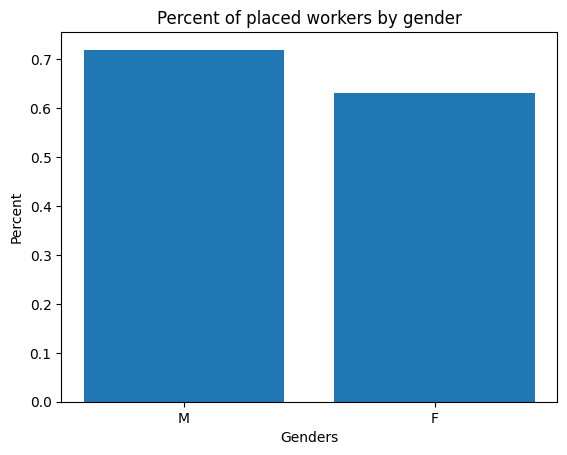

In [341]:
genders = dataset['gender'].unique()
placed_percents = []

for gender in genders:
  partial_df = dataset[dataset['gender'] == gender]
  count = len(partial_df.index)
  placed_count = partial_df['status'].value_counts().to_numpy()[0]
  percent = placed_count / count
  placed_percents.append(percent)

plt.bar(genders, placed_percents)

plt.xlabel('Genders')
plt.ylabel('Percent')
plt.title('Percent of placed workers by gender')
plt.show()

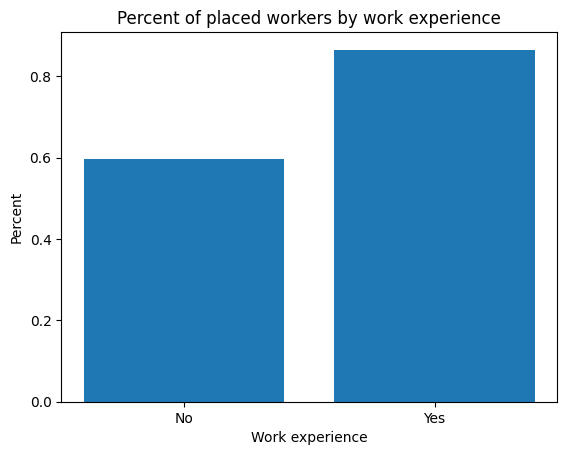

In [342]:
work_experiences = dataset['work_experience'].unique()
placed_percents = []

for work_experience in work_experiences:
  partial_df = dataset[dataset['work_experience'] == work_experience]
  count = len(partial_df.index)
  placed_count = partial_df['status'].value_counts().to_numpy()[0]
  percent = placed_count / count
  placed_percents.append(percent)

plt.bar(work_experiences, placed_percents)

plt.xlabel('Work experience')
plt.ylabel('Percent')
plt.title('Percent of placed workers by work experience')
plt.show()


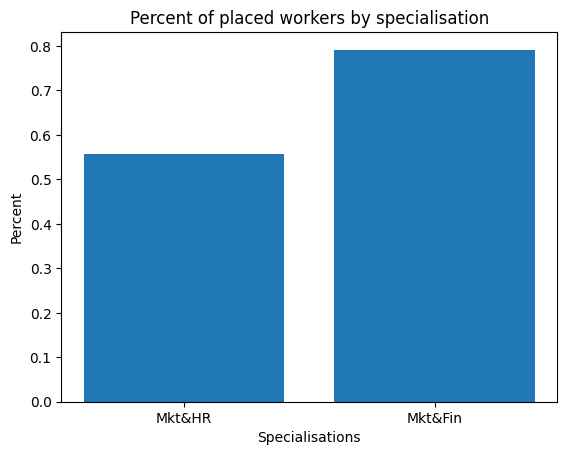

In [343]:
specialisations = dataset['specialisation'].unique()
placed_percents = []

for specialisation in specialisations:
  partial_df = dataset[dataset['specialisation'] == specialisation]
  count = len(partial_df.index)
  placed_count = partial_df['status'].value_counts().to_numpy()[0]
  percent = placed_count / count
  placed_percents.append(percent)

plt.bar(specialisations, placed_percents)

plt.xlabel('Specialisations')
plt.ylabel('Percent')
plt.title('Percent of placed workers by specialisation')
plt.show()

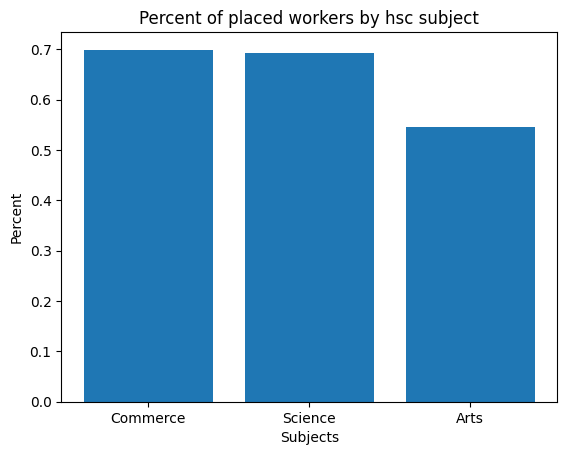

In [344]:
hsc_subjects = dataset['hsc_subject'].unique()
placed_percents = []

for hsc_subject in hsc_subjects:
  partial_df = dataset[dataset['hsc_subject'] == hsc_subject]
  count = len(partial_df.index)
  placed_count = partial_df['status'].value_counts().to_numpy()[0]
  percent = placed_count / count
  placed_percents.append(percent)

plt.bar(hsc_subjects, placed_percents)

plt.xlabel('Subjects')
plt.ylabel('Percent')
plt.title('Percent of placed workers by hsc subject')
plt.show()

## Clean data

In [345]:
categorical_columns = [
  'gender',
  'ssc_board',
  'hsc_board',
  'hsc_subject',
  'undergrad_degree',
  'work_experience',
  'specialisation',
  'status',
]

for column in categorical_columns:
  dataset[column] = pd.Categorical(dataset[column]).codes

dataset

,gender,ssc_percentage,ssc_board,hsc_percentage,hsc_board,hsc_subject,degree_percentage,undergrad_degree,work_experience,emp_test_percentage,specialisation,mba_percent,status
0,1,67.00,1,91.00,1,1,58.00,2,0,55.0,1,58.80,1
1,1,79.33,0,78.33,1,2,77.48,2,1,86.5,0,66.28,1
2,1,65.00,0,68.00,0,0,64.00,0,0,75.0,0,57.80,1
3,1,56.00,0,52.00,0,2,52.00,2,0,66.0,1,59.43,0
4,1,85.80,0,73.60,0,1,73.30,0,0,96.8,0,55.50,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
210,1,80.60,1,82.00,1,1,77.60,0,0,91.0,0,74.49,1
211,1,58.00,1,60.00,1,2,72.00,2,0,74.0,0,53.62,1
212,1,67.00,1,67.00,1,1,73.00,0,1,59.0,0,69.72,1
213,0,74.00,1,66.00,1,1,58.00,0,0,70.0,1,60.23,1


## Training and validating data

In [346]:
dataset = dataset.sample(frac=1, random_state=1234)

x = dataset.drop(columns=['status']).to_numpy()
y = dataset['status'].to_numpy().reshape(215, 1)

x_train = x[:190]
y_train = y[:190]

x_test = x[190:]
y_test = y[190:]

## Model

In [347]:
model = keras.models.Sequential([
  keras.layers.Dense(128, input_dim=x_train.shape[1], activation='relu'),
  keras.layers.Dropout(0.1),
  keras.layers.Dense(128, activation='relu'),
  keras.layers.Dropout(0.1),
  keras.layers.Dense(128, activation='relu'),
  keras.layers.Dropout(0.1),
  keras.layers.Dense(1, activation='sigmoid'),
])

In [348]:
model.compile(
  loss='binary_crossentropy',
  metrics=['binary_accuracy'],
  optimizer=keras.optimizers.Adam(learning_rate=0.001),
)

In [349]:
history = model.fit(
  x_train,
  y_train,
  batch_size=100,
  epochs=1000,
  validation_data=(x_test, y_test),
  verbose=1,
)

Epoch 1/1000
2/2 [==============================] - 0s 65ms/step - loss: 2.2538 - binary_accuracy: 0.5368 - val_loss: 1.6330 - val_binary_accuracy: 0.1200
Epoch 2/1000
2/2 [==============================] - 0s 13ms/step - loss: 1.6098 - binary_accuracy: 0.5579 - val_loss: 0.5029 - val_binary_accuracy: 0.8400
Epoch 3/1000
2/2 [==============================] - 0s 13ms/step - loss: 1.8271 - binary_accuracy: 0.5632 - val_loss: 0.4487 - val_binary_accuracy: 0.8400
Epoch 4/1000
2/2 [==============================] - 0s 13ms/step - loss: 1.2214 - binary_accuracy: 0.6421 - val_loss: 0.3639 - val_binary_accuracy: 0.8800
Epoch 5/1000
2/2 [==============================] - 0s 13ms/step - loss: 1.1018 - binary_accuracy: 0.5947 - val_loss: 0.3642 - val_binary_accuracy: 0.8400
Epoch 6/1000
2/2 [==============================] - 0s 13ms/step - loss: 1.1543 - binary_accuracy: 0.5895 - val_loss: 0.3426 - val_binary_accuracy: 0.8800
Epoch 7/1000
2/2 [==============================] - 0s 13ms/step - los

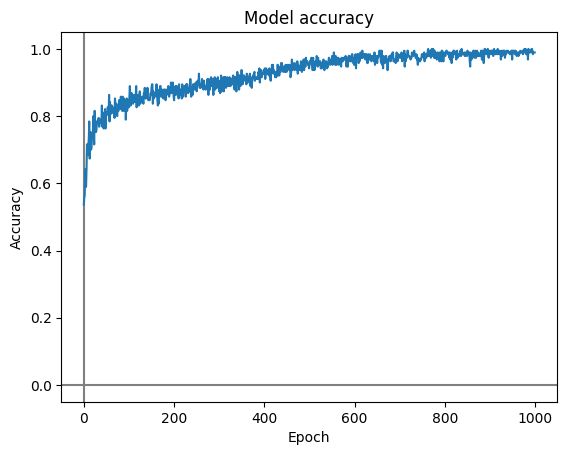

In [350]:
plt.axhline(0, color='gray')
plt.axvline(0, color='gray')
plt.plot(history.history['binary_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.show()

In [351]:
loss, accuracy = model.evaluate(x_test, y_test, verbose=1)
accuracy

1/1 [==============================] - 0s 11ms/step - loss: 0.3127 - binary_accuracy: 0.9200


0.9200000166893005

In [354]:
# model.save('model')

INFO:tensorflow:Assets written to: model/assets
